<h2> Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data_Train.xlsx to Data_Train.xlsx
User uploaded file "Data_Train.xlsx" with length 633801 bytes


<h2> EDA

In [60]:
df = pd.read_excel('Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [ ]:
df['Additional_Info'].value_counts()/len(df)

Null                            0.781335
In-flight meal not included     0.185528
No check-in baggage included    0.029954
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
Null                            0.000094
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

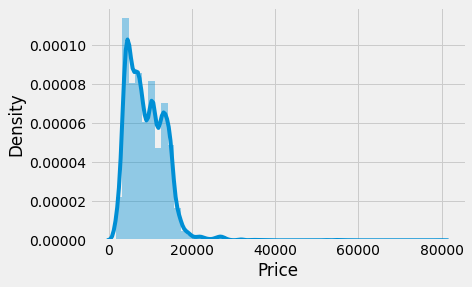

In [ ]:
sns.distplot(df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [61]:
df = df.dropna()

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<h3>Extracting day & month from datetime object

In [62]:
def change_datetime(col):
  df[col]=pd.to_datetime(df[col])

In [63]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_datetime(i)

In [64]:
df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.month

In [65]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [66]:
# extract_hour function
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
# extract__minute function
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
# drop columns function
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [67]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_column(df,'Dep_Time')

In [68]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

In [69]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'      
        else:
            duration[i]='0h '+ duration[i] 

In [70]:
df['Duration']=duration

In [71]:
def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [72]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)

In [73]:
df.drop('Duration',axis=1,inplace=True)

In [74]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,13302,3,1,16,50,21,35,4,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_day          10682 non-null  int64 
 8   Journey_month        10682 non-null  int64 
 9   Dep_Time_hour        10682 non-null  int64 
 10  Dep_Time_minute      10682 non-null  int64 
 11  Arrival_Time_hour    10682 non-null  int64 
 12  Arrival_Time_minute  10682 non-null  int64 
 13  Duration_hours       10682 non-null  object
 14  Duration_mins        10682 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [75]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)

In [ ]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

<h3>Numerical Features

In [76]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

<h3> Categorical Features

In [77]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [78]:
categorical=df[cat_features]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null


In [79]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

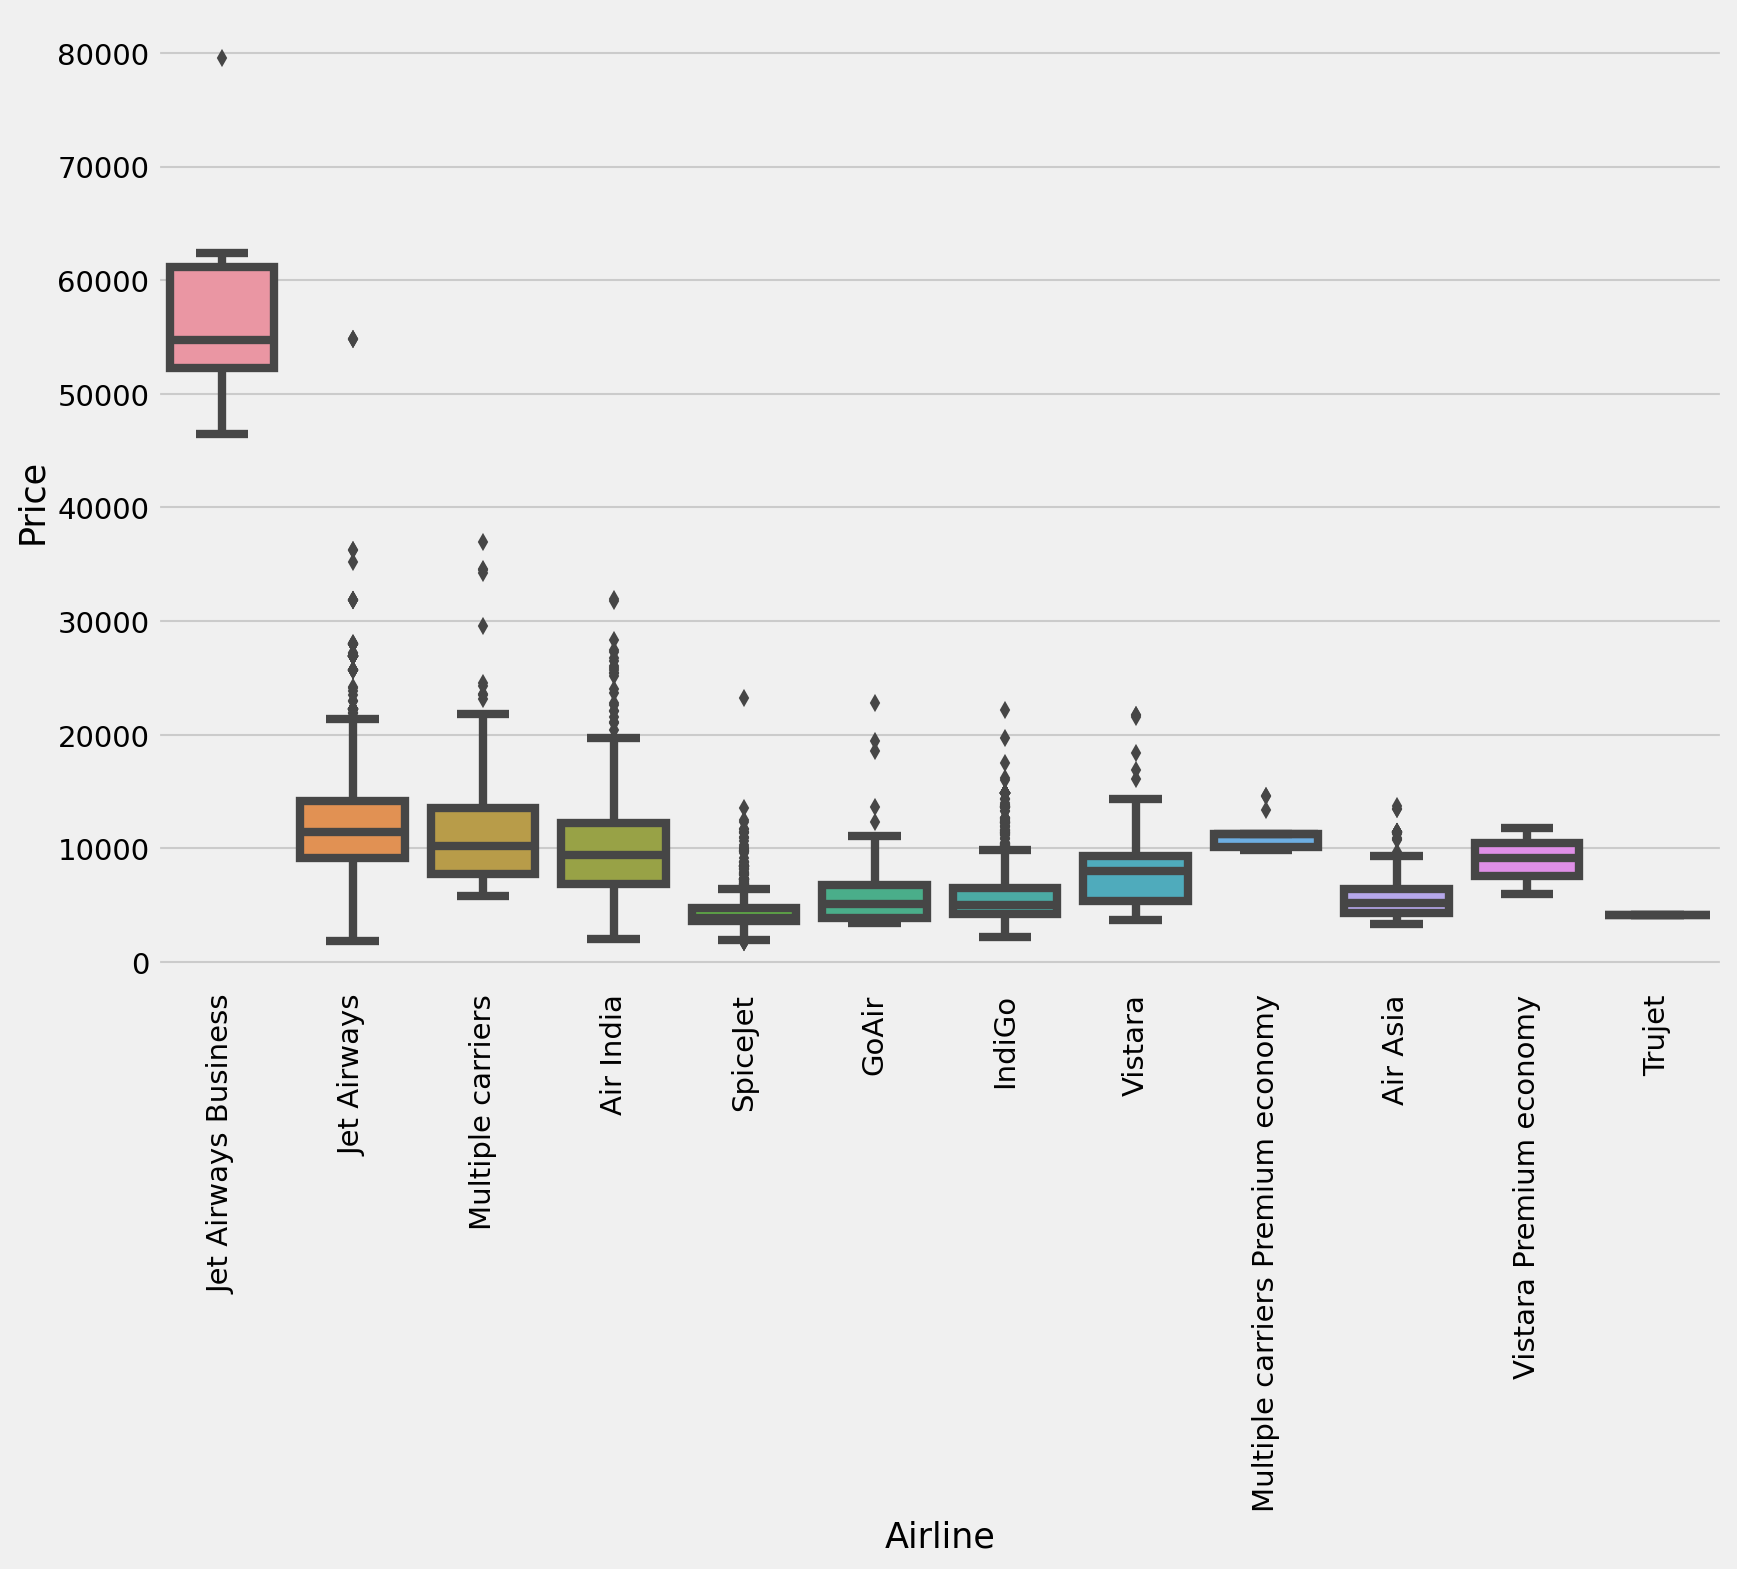

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
sns.boxplot(y='Price', x='Airline', data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)

In [80]:
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 1800x1200 with 0 Axes>

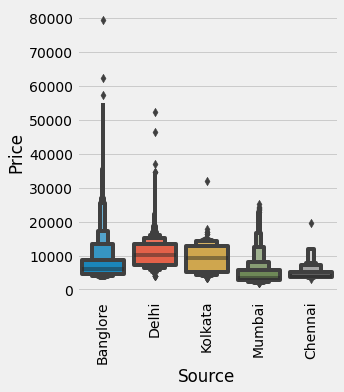

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
sns.catplot(y='Price', x='Source', data=df.sort_values('Price',ascending=False), kind='boxen')
plt.xticks(rotation=90)

In [81]:
Source=pd.get_dummies(categorical['Source'], drop_first=True, prefix='source')
Source.head()

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

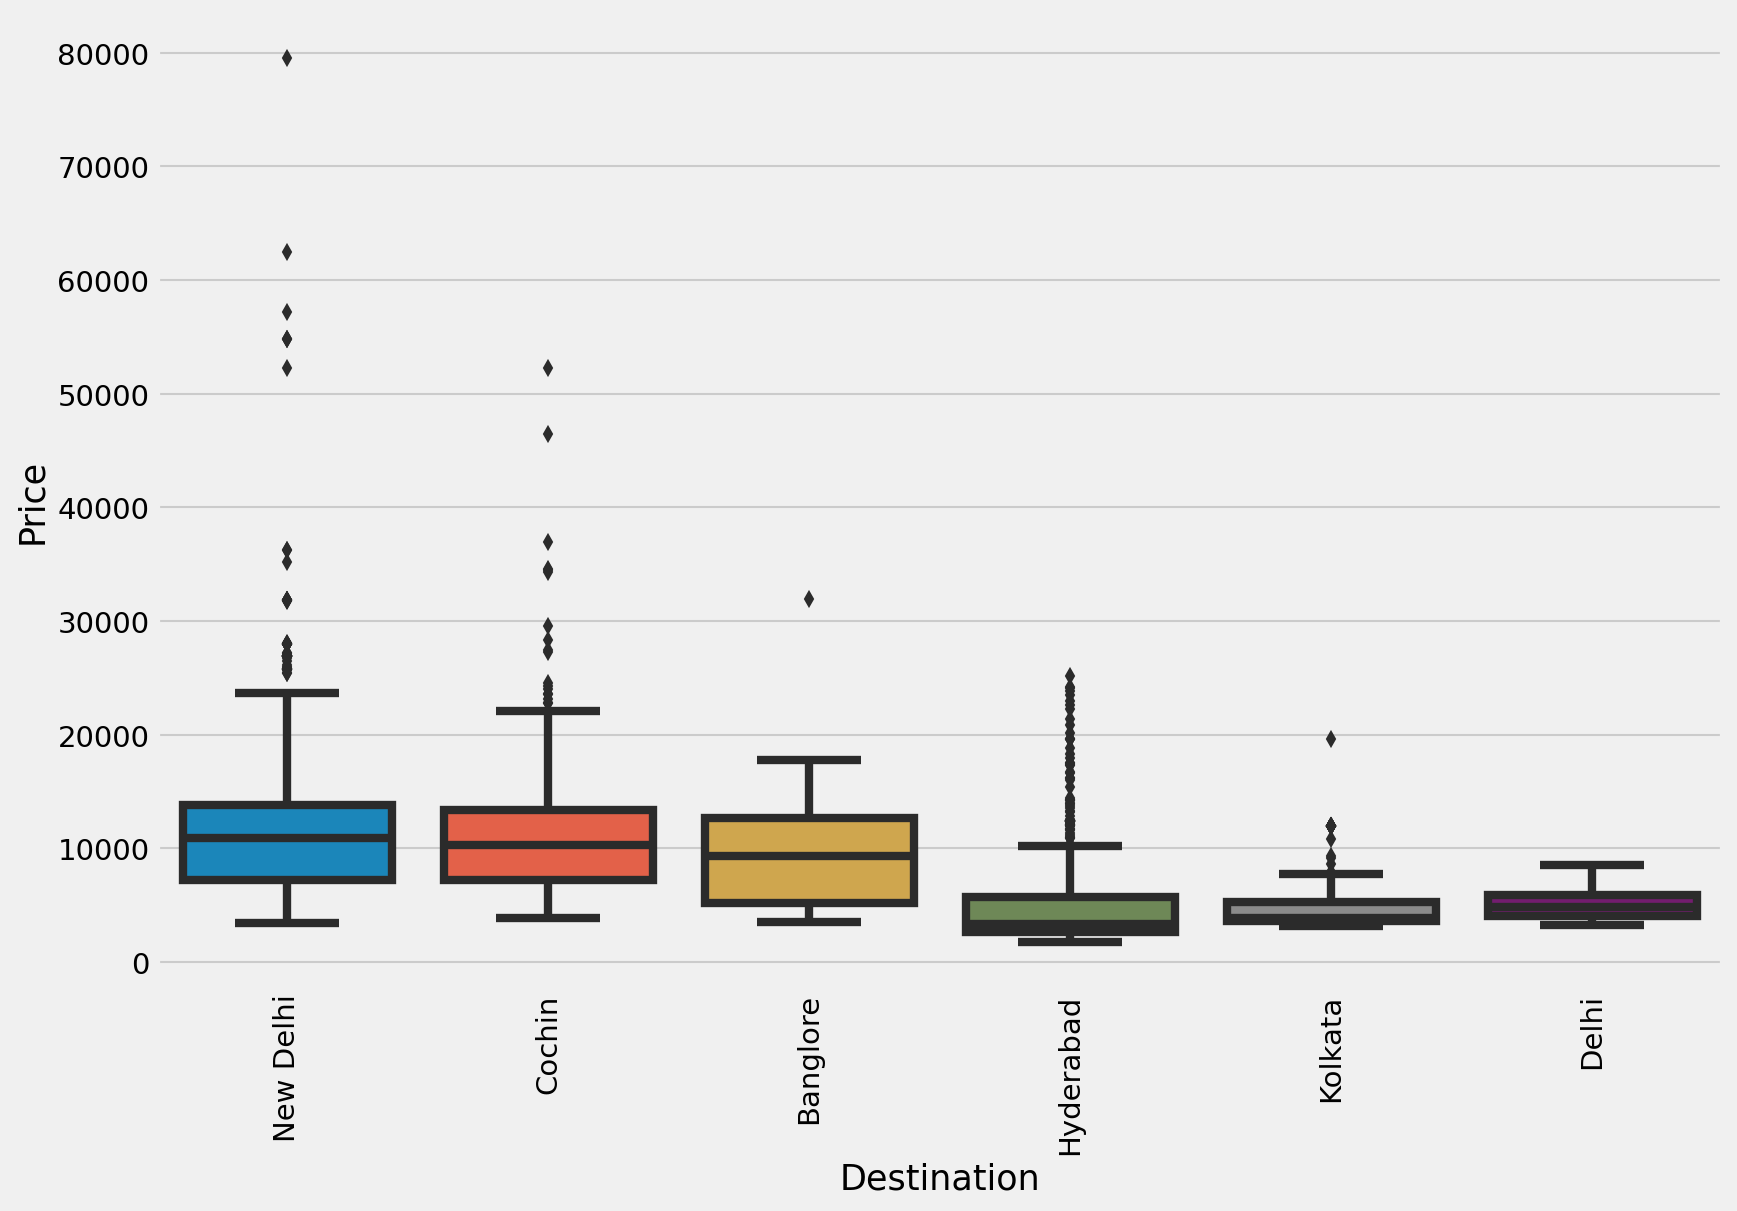

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
sns.boxplot(y='Price', x='Destination', data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)

In [82]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True, prefix='dest')
Destination.head()

,dest_Cochin,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [103]:
categorical['Route_3']

0        21
1         1
2         4
3         3
4         7
         ..
10678    21
10679    21
10680    21
10681    21
10682     4
Name: Route_3, Length: 10682, dtype: int64

In [92]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_1'] = categorical['Route_1'].str.strip()
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_2'] = categorical['Route_2'].str.strip()
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_3'] = categorical['Route_3'].str.strip()
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_4'] = categorical['Route_4'].str.strip()
categorical['Route_5']=categorical['Route'].str.split('→').str[4]
categorical['Route_5'] = categorical['Route_5'].str.strip()

In [93]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,BLR,NAG,DEL,NaN,NaN


In [94]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [95]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,BLR,NAG,DEL,None,None


In [96]:
for feature in categorical.columns:
    print(f'{feature} has total {len(categorical[feature].value_counts())} categories \n')

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 40 categories 

Route_3 has total 27 categories 

Route_4 has total 12 categories 

Route_5 has total 6 categories 



In [97]:
encoder_1=LabelEncoder()
encoder_2=LabelEncoder()
encoder_3=LabelEncoder()
encoder_4=LabelEncoder()
encoder_5=LabelEncoder()
# for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
#     categorical[i]=encoder.fit_transform(categorical[i])

In [98]:
categorical["Route_1"]=encoder_1.fit_transform(categorical["Route_1"])
categorical["Route_2"]=encoder_2.fit_transform(categorical["Route_2"])
categorical["Route_3"]=encoder_3.fit_transform(categorical["Route_3"])
categorical["Route_4"]=encoder_4.fit_transform(categorical["Route_4"])
categorical["Route_5"]=encoder_5.fit_transform(categorical["Route_5"])

In [99]:
encoder_1.classes_

array(['BLR', 'BOM', 'CCU', 'DEL', 'MAA'], dtype=object)

In [100]:
encoder_2.classes_

array(['AMD', 'ATQ', 'BBI', 'BDQ', 'BHO', 'BLR', 'BOM', 'CCU', 'COK',
       'DED', 'DEL', 'GAU', 'GOI', 'GWL', 'HBX', 'HYD', 'IDR', 'IXA',
       'IXB', 'IXC', 'IXR', 'IXU', 'IXZ', 'JAI', 'JDH', 'JLR', 'KNU',
       'LKO', 'MAA', 'NAG', 'NDC', 'PAT', 'PNQ', 'RPR', 'STV', 'TRV',
       'UDR', 'VGA', 'VNS', 'VTZ'], dtype=object)

In [106]:
encoder_4.classes_

array(['AMD', 'BBI', 'BHO', 'BLR', 'BOM', 'COK', 'DEL', 'GWL', 'HYD',
       'NAG', 'None', 'TRV'], dtype=object)

In [105]:
from joblib import dump, load
encoding_1 = dump(encoder_1, 'encoder_1.pkl')
encoding_2 = dump(encoder_2, 'encoder_2.pkl')
encoding_3 = dump(encoder_3, 'encoder_3.pkl')
encoding_4 = dump(encoder_4, 'encoder_4.pkl')
encoding_5 = dump(encoder_5, 'encoder_5.pkl')

In [38]:
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [ ]:
categorical.head()

In [40]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [42]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [43]:
df[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [44]:
data = pd.concat([categorical,Airline,Source,Destination,df[num_features]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,dest_Cochin,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [45]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [46]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,dest_Cochin,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [47]:
data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', 'dest_Cochin',
       'dest_Delhi', 'dest_Hyderabad', 'dest_Kolkata', 'dest_New Delhi',
       'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

<h2> Building model

In [48]:
X=data.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,dest_Cochin,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [49]:
y=data['Price']

In [50]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.2, random_state=101))
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.2, random_state=101))

In [51]:
feature_sel_model.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 19,
       20, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [52]:
cols=X.columns
selected_feat = cols[(feature_sel_model.get_support())]

In [53]:
selected_feat

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'source_Kolkata', 'source_Mumbai',
       'dest_Kolkata', 'dest_New Delhi', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [59]:
column_names = dump(selected_feat, 'column_names.pkl')

In [107]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: scipy, joblib, threadpoolctl, numpy
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai


In [54]:
x=X[selected_feat]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle =True)

In [56]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (8545, 28)
X_test shape is  (2137, 28)
y_train shape is  (8545,)
y_test shape is  (2137,)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [58]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2=r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2))
    print('MAE:', mean_absolute_error(y_test,y_prediction))
    print('MSE:', mean_squared_error(y_test,y_prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [ ]:
random_forest_model = RandomForestRegressor()

In [ ]:
max_depth=[5, 6, 7]
min_samples_split= [5,10,15,200]
min_samples_leaf= [5,10, 15, 200]

In [ ]:
param_grid={
    'max_depth':max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }

In [ ]:
rf_model=GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 200],
                         'min_samples_split': [5, 10, 15, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
random_forest_model = rf_model.best_estimator_

Training score : 0.8217885169937802
predictions are: 
 [ 4028.31986133  6926.37165566 12297.53077103 ...  4028.31986133
  7721.61906719  6031.27583378]


r2 score: 0.80276781629428
MAE: 1384.6761152067584
MSE: 3683135.2712630406
RMSE: 1919.149621906286


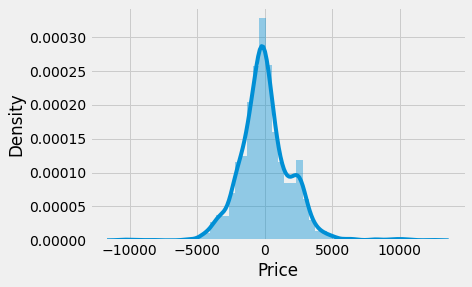

In [ ]:
predict(random_forest_model)

In [ ]:
gradient_model = GradientBoostingRegressor(learning_rate=0.1,)

In [ ]:
ada_model = AdaBoostRegressor(learning_rate=0.1,)

In [ ]:
param_grid={
    'n_estimators': [100, 200, 500]
    }

In [ ]:
grad_model=GridSearchCV(estimator=gradient_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
adaboost_model=GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
grad_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
adaboost_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(learning_rate=0.1), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grad_model = grad_model.best_estimator_

In [ ]:
ada_model = adaboost_model.best_estimator_

Training score : 0.8684487947542903
predictions are: 
 [ 3705.0954936  10665.82835309 12303.70792369 ...  3989.21810278
  9432.71547362  6894.7673123 ]


r2 score: 0.8382477074143164
MAE: 1232.1289401702907
MSE: 3513897.4689887427
RMSE: 1874.5392684573835


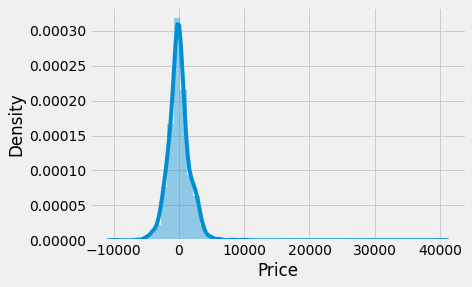

In [ ]:
predict(grad_model)

In [ ]:
model = dump(grad_model, 'model.pkl')

Training score : 0.5779483778949619
predictions are: 
 [ 5610.65533597  5653.61316538 10788.14808721 ...  5610.65533597
 10582.1784609   5630.89965904]


r2 score: 0.5581488670146387
MAE: 2387.9291070883496
MSE: 9598748.5126037
RMSE: 3098.1847124733704


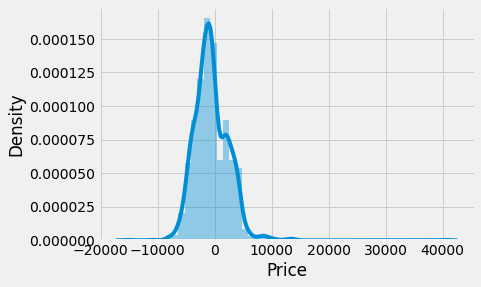

In [ ]:
predict(ada_model)

Training score : 0.9582602125996644
predictions are: 
 [ 3784.64090087 11939.42445539 12662.78812508 ...  3915.55834726
  8922.32862718  8088.6538286 ]


r2 score: 0.812844961861233
MAE: 1163.1846384240873
MSE: 3494953.5578431105
RMSE: 1869.4794884788414


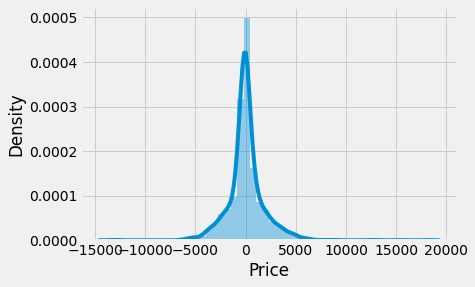

In [ ]:
predict(gradient_model)

Training score : 0.6247844571346812
predictions are: 
 [ 4555.41047028  6540.68284725 14038.98636534 ...  3190.82123985
  9279.00624733  6218.77783269]


r2 score: 0.6310580018463772
MAE: 1881.7680847971444
MSE: 6889663.040375611
RMSE: 2624.816763199978


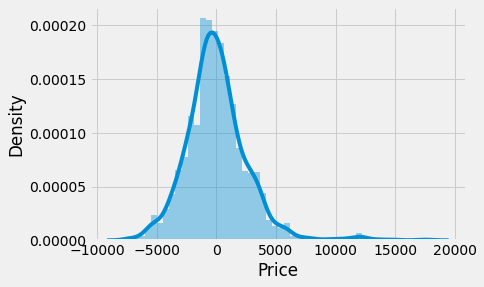

In [ ]:
predict(LinearRegression())

Training score : 0.7172029892759024
predictions are: 
 [ 3979.8677496  12711.74339084 10403.45039868 ...  3882.27404625
  7826.29808669  6333.9809153 ]


r2 score: 0.7105870944750321
MAE: 1647.0388243911677
MSE: 5404528.106265718
RMSE: 2324.7640969065483


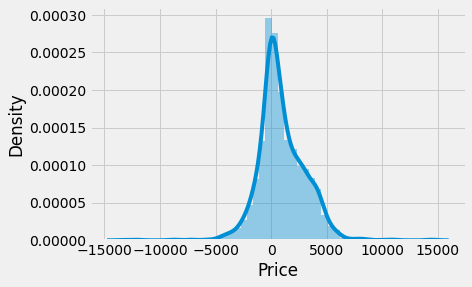

In [ ]:
predict(MLPRegressor( activation='relu' , solver='adam',
    alpha=0.1,
    batch_size=100,
    learning_rate='adaptive',
    learning_rate_init=0.5))

Training score : 0.6247798295894826
predictions are: 
 [ 4554.04548528  6539.09163902 14036.96704981 ...  3189.486285
  9279.5348124   6217.12148672]


r2 score: 0.6311204878519145
MAE: 1881.303259988438
MSE: 6888496.169905329
RMSE: 2624.5944772298308


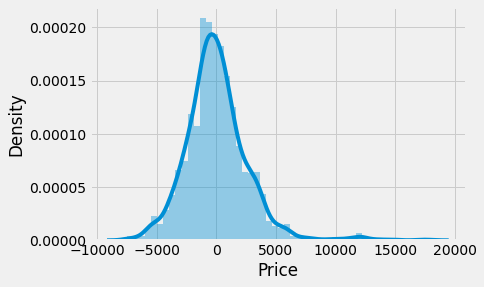

In [ ]:
predict(Lasso(alpha=.1))

Training score : 0.6239211758916768
predictions are: 
 [ 4539.8633402   6524.55727748 14018.26375096 ...  3181.24571513
  9305.3552756   6218.94862498]


r2 score: 0.6306137656812556
MAE: 1884.330586573472
MSE: 6897958.754887248
RMSE: 2626.3965342056117


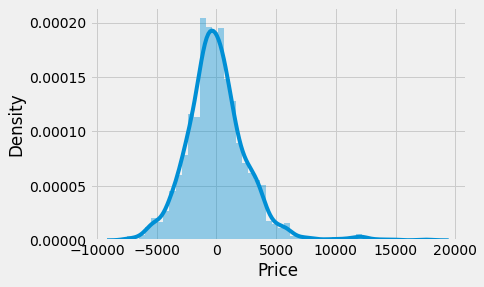

In [ ]:
predict(Ridge(solver='saga', alpha=.1))

Training score : 0.7894465700561046
predictions are: 
 [ 3926.8  6940.2 12484.8 ...  3920.4 10205.8  7600. ]


r2 score: 0.6730547078236866
MAE: 1676.4892840430512
MSE: 6105411.980758072
RMSE: 2470.913187620737


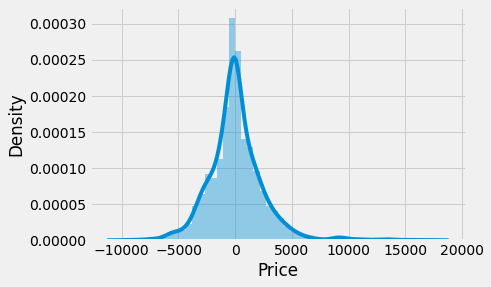

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', n_jobs=-1)
predict(knn_model)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()

[05:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score : 0.8021795917765919
predictions are: 
 [ 3781.4912  7546.111  12778.203  ...  4147.303   9201.884   6534.572 ]


r2 score: 0.791370127275935
MAE: 1440.9056816333134
MSE: 4532263.314488692
RMSE: 2128.9112979381484


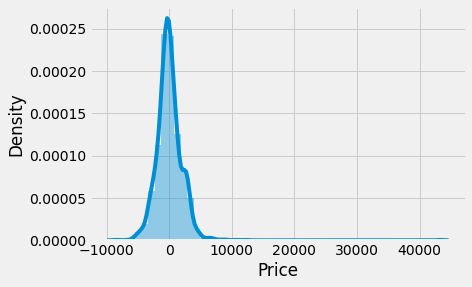

In [ ]:
predict(xgb_model)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()

Training score : 0.041086835323554394
predictions are: 
 [7977.19159894 8004.25120385 8320.41513533 ... 7930.65585636 8556.38391643
 8207.41294511]


r2 score: 0.04629379005213485
MAE: 3456.0972060382924
MSE: 20718258.664058406
RMSE: 4551.731391905547


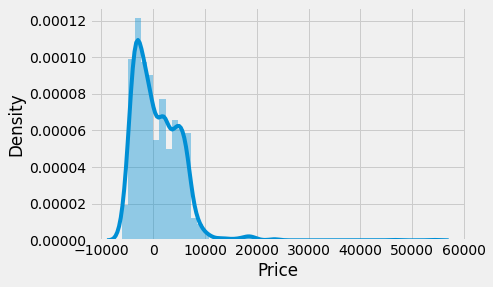

In [ ]:
predict(svr_model)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=150)

Epoch 1/150
67/67 [==============================] - 2s 13ms/step - loss: 77640576.0000 - mean_squared_error: 77640576.0000 - val_loss: 30187054.0000 - val_mean_squared_error: 30187054.0000
Epoch 2/150
67/67 [==============================] - 1s 9ms/step - loss: 22970844.0000 - mean_squared_error: 22970844.0000 - val_loss: 18332718.0000 - val_mean_squared_error: 18332718.0000
Epoch 3/150
67/67 [==============================] - 1s 9ms/step - loss: 17708562.0000 - mean_squared_error: 17708562.0000 - val_loss: 15695655.0000 - val_mean_squared_error: 15695655.0000
Epoch 4/150
67/67 [==============================] - 0s 6ms/step - loss: 16654667.0000 - mean_squared_error: 16654667.0000 - val_loss: 15000544.0000 - val_mean_squared_error: 15000544.0000
Epoch 5/150
67/67 [==============================] - 0s 6ms/step - loss: 15981618.0000 - mean_squared_error: 15981618.0000 - val_loss: 14384412.0000 - val_mean_squared_error: 14384412.0000
Epoch 6/150
67/67 [==============================] - 0

<h2> Gradient Boost model performed well compared to other models